In [1]:
# Import the libraries
import yfinance as yf

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Create an object to access AMZN stock
stock = yf.Ticker('AMZN')

In [4]:
# Load AMZN's historical data
hist_data = stock.history(period='1y')
hist_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-05-09 00:00:00-04:00,105.480003,106.790001,105.160004,106.620003,44089400,0.0,0.0
2023-05-10 00:00:00-04:00,108.099998,110.669998,108.050003,110.190002,78627600,0.0,0.0
2023-05-11 00:00:00-04:00,111.029999,113.279999,110.489998,112.180000,74924800,0.0,0.0
2023-05-12 00:00:00-04:00,112.160004,112.639999,109.320000,110.260002,49810100,0.0,0.0
2023-05-15 00:00:00-04:00,111.150002,112.290001,109.250000,111.199997,53011100,0.0,0.0
...,...,...,...,...,...,...,...
2024-05-02 00:00:00-04:00,180.850006,185.100006,179.910004,184.720001,54303500,0.0,0.0
2024-05-03 00:00:00-04:00,186.990005,187.869995,185.419998,186.210007,39172000,0.0,0.0
2024-05-06 00:00:00-04:00,186.279999,188.750000,184.800003,188.699997,34725300,0.0,0.0


In [5]:
# Extract closing prices
prices = hist_data['Close']
prices

Date
2023-05-09 00:00:00-04:00    106.620003
2023-05-10 00:00:00-04:00    110.190002
2023-05-11 00:00:00-04:00    112.180000
2023-05-12 00:00:00-04:00    110.260002
2023-05-15 00:00:00-04:00    111.199997
                                ...    
2024-05-02 00:00:00-04:00    184.720001
2024-05-03 00:00:00-04:00    186.210007
2024-05-06 00:00:00-04:00    188.699997
2024-05-07 00:00:00-04:00    188.759995
2024-05-08 00:00:00-04:00    188.000000
Name: Close, Length: 252, dtype: float64

In [6]:
# Compute the log-returns
log_rets = np.log(prices / prices.shift(1))
log_rets

Date
2023-05-09 00:00:00-04:00         NaN
2023-05-10 00:00:00-04:00    0.032935
2023-05-11 00:00:00-04:00    0.017899
2023-05-12 00:00:00-04:00   -0.017263
2023-05-15 00:00:00-04:00    0.008489
                               ...   
2024-05-02 00:00:00-04:00    0.031455
2024-05-03 00:00:00-04:00    0.008034
2024-05-06 00:00:00-04:00    0.013283
2024-05-07 00:00:00-04:00    0.000318
2024-05-08 00:00:00-04:00   -0.004034
Name: Close, Length: 252, dtype: float64

In [7]:
log_rets = log_rets.dropna()
log_rets

Date
2023-05-10 00:00:00-04:00    0.032935
2023-05-11 00:00:00-04:00    0.017899
2023-05-12 00:00:00-04:00   -0.017263
2023-05-15 00:00:00-04:00    0.008489
2023-05-16 00:00:00-04:00    0.019591
                               ...   
2024-05-02 00:00:00-04:00    0.031455
2024-05-03 00:00:00-04:00    0.008034
2024-05-06 00:00:00-04:00    0.013283
2024-05-07 00:00:00-04:00    0.000318
2024-05-08 00:00:00-04:00   -0.004034
Name: Close, Length: 251, dtype: float64

Text(0.5, 1.0, 'Log-return distribution of AMZN')

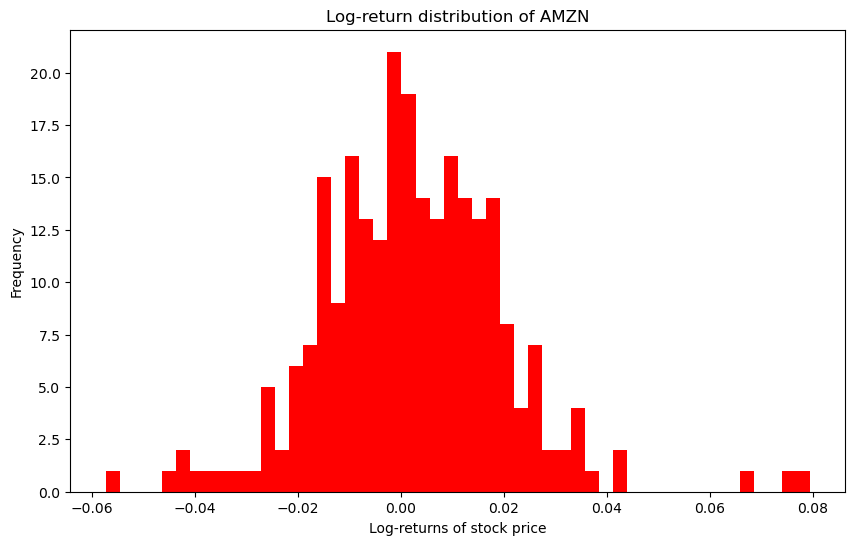

In [8]:
# Plot the histogram of log-returns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(log_rets, bins=50, color='red')

plt.xlabel('Log-returns of stock price')
plt.ylabel('Frequency')
plt.title('Log-return distribution of AMZN')

Text(0.5, 1.0, 'Q-Q plots')

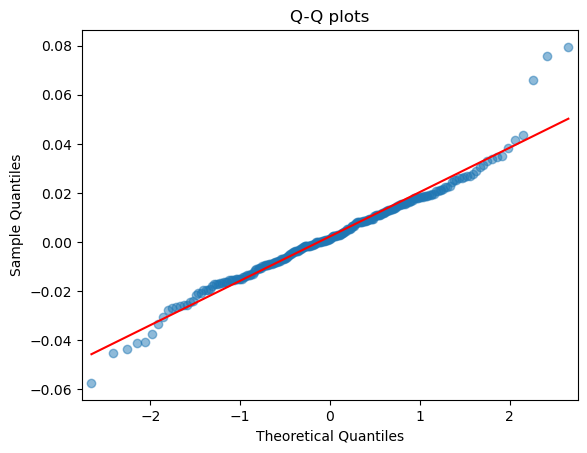

In [9]:
# Plot the Q-Q plot
import statsmodels.api as sm

fig = sm.qqplot(log_rets, line='s', alpha=0.5)
plt.title('Q-Q plots')

In [10]:
# Compute skew and kurtosis
import scipy.stats as scs

skew = scs.skew(log_rets)
skew

0.4237582066695758

In [11]:
kurtosis = scs.kurtosis(log_rets)
kurtosis

2.392335405352944

In [12]:
print(f'Skew of sample log-returns {skew:.6f}')

Skew of sample log-returns 0.423758


In [13]:
print(f'Kurtosis of sample log-returns {kurtosis:.6f}')

Kurtosis of sample log-returns 2.392335


In [14]:
# Execute the skew test
p_value = scs.skewtest(log_rets)[1]
print(f'Skew Normal test {p_value:.6f}')

Skew Normal test 0.006673


In [15]:
# Execute the kurtosis test
p_value = scs.kurtosistest(log_rets)[1]
print(f'Kurtosis Normal test {p_value:.6f}')

Kurtosis Normal test 0.000019


In [16]:
# Execute the normal test
p_value = scs.normaltest(log_rets)[1]
print(f'Normal test {p_value:.6f}')

Normal test 0.000003
